In [14]:
import urllib.request 
import urllib.parse
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import gc

In [2]:
df = pd.read_csv("gangnam_idx100.csv", encoding = 'euc-kr')

In [3]:
df.head(1)

,Unnamed: 0,name,genre,view_count,review_count,url,rate,favorite_count,address,phone,price,open_start,open_end,cnt_good,cnt_soso,cnt_bad
0,0,정돈 프리미엄,까스 요리,36403,74,/restaurants/MyeCz_JlSgan,4.8,1111,서울시 강남구 신사동 519-4,02-549-0924,만원-2만원,11:30,22:00,67,6,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
Unnamed: 0        1000 non-null int64
name              1000 non-null object
genre             1000 non-null object
view_count        1000 non-null int64
review_count      1000 non-null int64
url               1000 non-null object
rate              745 non-null float64
favorite_count    1000 non-null int64
address           1000 non-null object
phone             972 non-null object
price             991 non-null object
open_start        959 non-null object
open_end          959 non-null object
cnt_good          1000 non-null int64
cnt_soso          1000 non-null int64
cnt_bad           1000 non-null int64
dtypes: float64(1), int64(7), object(8)
memory usage: 125.1+ KB


In [5]:
# 기본적인 결측치 처리
# 전화번호는 없어도 괜찮기 때문에 따로 결측치 처리를 하지 않는다.
# 스크래핑한 데이터의 rate는 내림차순이기 떄문에 결측치는 전 데이터의 rate를 가져와도 무방하다.
df['rate'] = df.rate.fillna(method = 'ffill')

# 영업시간은 그다지 쓸모가 없어보이므로 제거한다.
df.drop(['open_start', 'open_end'], axis = 1, inplace = True)

# 가격대가 없는 곳의 수는 적으므로 제거한다.
df.dropna(axis = 'index', how = 'any', subset = ['price'], inplace = True)

# index 재설정
df.reset_index(inplace = True)
df.drop('index', axis = 1, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 14 columns):
Unnamed: 0        991 non-null int64
name              991 non-null object
genre             991 non-null object
view_count        991 non-null int64
review_count      991 non-null int64
url               991 non-null object
rate              991 non-null float64
favorite_count    991 non-null int64
address           991 non-null object
phone             963 non-null object
price             991 non-null object
cnt_good          991 non-null int64
cnt_soso          991 non-null int64
cnt_bad           991 non-null int64
dtypes: float64(1), int64(7), object(6)
memory usage: 108.5+ KB


### 네이버 API를 통해서 주소의 좌표를 검색

In [6]:
client_id = "####"
client_secret = "####"

In [7]:
def address_to_axis(address):
    encText = urllib.parse.quote(address)
    url = "https://openapi.naver.com/v1/map/geocode?query=" + encText
    
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    
    if(rescode == 200):
        data_info = json.load(response)
        axis_x = data_info['result']['items'][0]['point']['x']
        axis_y = data_info['result']['items'][0]['point']['y']
        
    else:
        axis_x = 'ERROR_CODE'
        axis_y = 'ERROR_CODE'
        
    return (axis_x, axis_y)

In [8]:
lst_axis_x = list()
lst_axis_y = list()

for i,address in enumerate(list(df.address)):
    x_axis, y_axis = address_to_axis(address)
    lst_axis_x.append(x_axis)
    lst_axis_y.append(y_axis)
    if i%20 == 0:
        gc.collect()
        print(i+1,"번째 레스토랑 완료")

1 번째 레스토랑 완료
21 번째 레스토랑 완료
41 번째 레스토랑 완료
61 번째 레스토랑 완료
81 번째 레스토랑 완료
101 번째 레스토랑 완료
121 번째 레스토랑 완료
141 번째 레스토랑 완료
161 번째 레스토랑 완료
181 번째 레스토랑 완료
201 번째 레스토랑 완료
221 번째 레스토랑 완료
241 번째 레스토랑 완료
261 번째 레스토랑 완료
281 번째 레스토랑 완료
301 번째 레스토랑 완료
321 번째 레스토랑 완료
341 번째 레스토랑 완료
361 번째 레스토랑 완료
381 번째 레스토랑 완료
401 번째 레스토랑 완료
421 번째 레스토랑 완료
441 번째 레스토랑 완료
461 번째 레스토랑 완료
481 번째 레스토랑 완료
501 번째 레스토랑 완료
521 번째 레스토랑 완료
541 번째 레스토랑 완료
561 번째 레스토랑 완료
581 번째 레스토랑 완료
601 번째 레스토랑 완료
621 번째 레스토랑 완료
641 번째 레스토랑 완료
661 번째 레스토랑 완료
681 번째 레스토랑 완료
701 번째 레스토랑 완료
721 번째 레스토랑 완료
741 번째 레스토랑 완료
761 번째 레스토랑 완료
781 번째 레스토랑 완료
801 번째 레스토랑 완료
821 번째 레스토랑 완료
841 번째 레스토랑 완료
861 번째 레스토랑 완료
881 번째 레스토랑 완료
901 번째 레스토랑 완료
921 번째 레스토랑 완료
941 번째 레스토랑 완료
961 번째 레스토랑 완료
981 번째 레스토랑 완료


In [9]:
df['x_axis'] = lst_axis_x
df['y_axis'] = lst_axis_y

In [10]:
df.head(2)

,Unnamed: 0,name,genre,view_count,review_count,url,rate,favorite_count,address,phone,price,cnt_good,cnt_soso,cnt_bad,x_axis,y_axis
0,0,정돈 프리미엄,까스 요리,36403,74,/restaurants/MyeCz_JlSgan,4.8,1111,서울시 강남구 신사동 519-4,02-549-0924,만원-2만원,67,6,1,127.021075,37.519778
1,1,베이크치즈타르트 (신세계백화점 강남점),카페 / 디저트,78361,120,/restaurants/JZM6HCHhwWoN,4.8,1646,서울시 서초구 반포동 19-3,02-3479-1204,만원 미만,108,10,2,127.003538,37.504322


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 16 columns):
Unnamed: 0        991 non-null int64
name              991 non-null object
genre             991 non-null object
view_count        991 non-null int64
review_count      991 non-null int64
url               991 non-null object
rate              991 non-null float64
favorite_count    991 non-null int64
address           991 non-null object
phone             963 non-null object
price             991 non-null object
cnt_good          991 non-null int64
cnt_soso          991 non-null int64
cnt_bad           991 non-null int64
x_axis            991 non-null float64
y_axis            991 non-null float64
dtypes: float64(3), int64(7), object(6)
memory usage: 124.0+ KB


### 레스토랑 데이터 탐색

In [22]:
path = 'NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=12)

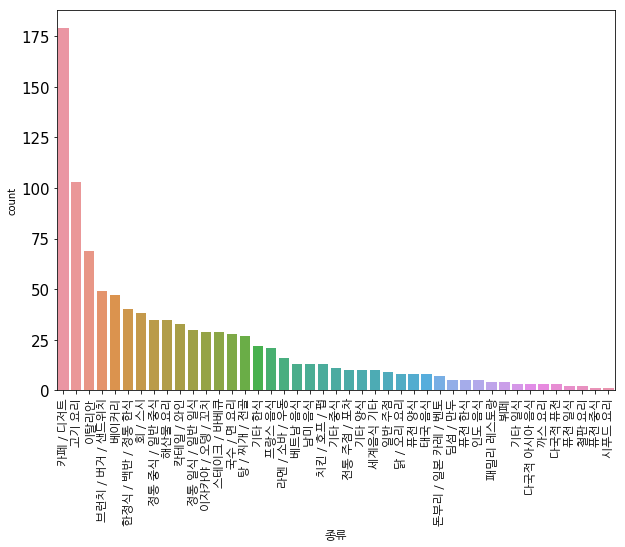

In [24]:
plt.figure(figsize = (10,7))
sns.countplot(df.genre, order = df.genre.value_counts().index)
plt.xticks( rotation = 'vertical', fontproperties = fontprop)
plt.yticks(size = 15)
plt.xlabel("종류", fontproperties = fontprop)
plt.show()

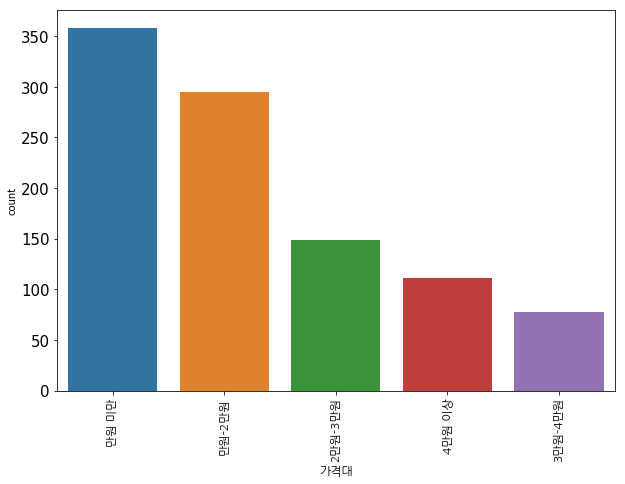

In [26]:
plt.figure(figsize = (10,7))
sns.countplot(df.price, order = df.price.value_counts().index)
plt.xticks( rotation = 'vertical', fontproperties = fontprop)
plt.yticks(size = 15)
plt.xlabel("가격대", fontproperties = fontprop)
plt.show()

In [38]:
#한정식 / 백반 / 정통 한식 + 만원 미만 ~ 만원-2만원
df_01 = df[((df.price == '만원 미만') | (df.price == '만원-2만원'))&(df.genre == '한정식 / 백반 / 정통 한식')]
df_01.name.count()

27

In [39]:
#카페 / 디저트 + 만원 미만
df_02 = df[(df.price == '만원 미만')&(df.genre == '카페 / 디저트')]
df_02.name.count()

164

In [40]:
#브런치 / 버거 / 샌드위치 + 만원 미만 ~ 만원-2만원
df_03 = df[((df.price == '만원 미만') | (df.price == '만원-2만원'))&(df.genre == '브런치 / 버거 / 샌드위치')]
df_03.name.count()

45

In [41]:
#고기 요리 + 만원 미만 ~ 만원-2만원
df_04 = df[((df.price == '만원 미만') | (df.price == '만원-2만원'))&(df.genre == '고기 요리')]
df_04.name.count()

48

In [42]:
#정통 중식 / 일반 중식 + 만원 미만 ~ 만원-2만원
df_05 = df[((df.price == '만원 미만') | (df.price == '만원-2만원'))&(df.genre == '정통 중식 / 일반 중식')]
df_05.name.count()

26

### 지도에 표시를 해보자

In [13]:
import folium

In [45]:
#df_01 표시
map_osm = folium.Map(location = [37.566345, 126.977893], zoom_start = 12)
data_set = df_01[['x_axis','y_axis']]
for _ in range(len(data_set.index)):
    data = data_set.iloc[_]
    x_ = data['x_axis']
    y_ = data['y_axis']
    folium.CircleMarker([float(y_), float(x_)]).add_to(map_osm)
map_osm.save("Gangnam_hanjungsik.html")  
map_osm

In [46]:
#df_02 표시
map_osm = folium.Map(location = [37.566345, 126.977893], zoom_start = 12)
data_set = df_02[['x_axis','y_axis']]
for _ in range(len(data_set.index)):
    data = data_set.iloc[_]
    x_ = data['x_axis']
    y_ = data['y_axis']
    folium.CircleMarker([float(y_), float(x_)]).add_to(map_osm)
map_osm.save("Gangnam_cafe.html")  
map_osm

In [47]:
#df_03 표시
map_osm = folium.Map(location = [37.566345, 126.977893], zoom_start = 12)
data_set = df_03[['x_axis','y_axis']]
for _ in range(len(data_set.index)):
    data = data_set.iloc[_]
    x_ = data['x_axis']
    y_ = data['y_axis']
    folium.CircleMarker([float(y_), float(x_)]).add_to(map_osm)
map_osm.save("Gangnam_brunchburger.html")  
map_osm

In [48]:
#df_04 표시
map_osm = folium.Map(location = [37.566345, 126.977893], zoom_start = 12)
data_set = df_04[['x_axis','y_axis']]
for _ in range(len(data_set.index)):
    data = data_set.iloc[_]
    x_ = data['x_axis']
    y_ = data['y_axis']
    folium.CircleMarker([float(y_), float(x_)]).add_to(map_osm)
map_osm.save("Gangnam_meat.html")  
map_osm

In [49]:
#df_05 표시
map_osm = folium.Map(location = [37.566345, 126.977893], zoom_start = 12)
data_set = df_05[['x_axis','y_axis']]
for _ in range(len(data_set.index)):
    data = data_set.iloc[_]
    x_ = data['x_axis']
    y_ = data['y_axis']
    folium.CircleMarker([float(y_), float(x_)]).add_to(map_osm)
map_osm.save("Gangnam_chinese.html")  
map_osm